In [1]:
#reading the data
import pandas as pd

df=pd.read_csv('e:\\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
#checking missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income             0
Spending Score (1-100)    0
dtype: int64

In [4]:
#Now, prepare X
#Ex: we want to segment the data on the basis of 'Annual Income' and 'Spending Score' feature

#intializing the values of 'Annual Income' and 'Spending Score' to X
X=df.iloc[:, [3, 4]].values
X.shape

(200, 2)

In [6]:
type(X)

numpy.ndarray

In [7]:
#Here we want to segment the data into 5 clusters

#Applying K-means clustering

from sklearn.cluster import KMeans

#n_clusters specifies the number of clusters to be made on the data
km=KMeans(n_clusters=5)
km.fit(X)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=n

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
#Now X is fitted on KMeans algorithm. It means KMeans understand the properties/features of the 
#data given in X.

#Now, using predict function, we can segment the data on these clusters.
km_predict=km.predict(X)
km_predict

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [9]:
#To view the data with cluster

df['Cluster']=km_predict
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [10]:
df.to_csv('e:\\Mall_cluster.csv')

Text(0, 0.5, 'Spending Score')

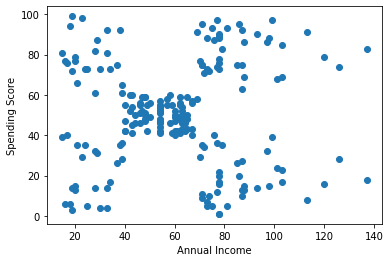

In [12]:
#To view the clusters graphically
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

Text(0, 0.5, 'Spending Score')

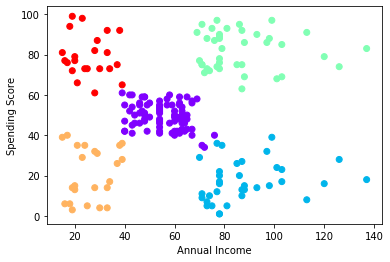

In [13]:
plt.scatter(X[:,0],X[:,1], c=km_predict, cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [17]:
#Prepare 4 clusters

km4=KMeans(n_clusters=4)
km4.fit(X)
km_predict4=km4.predict(X)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56

Text(0, 0.5, 'Spending Score')

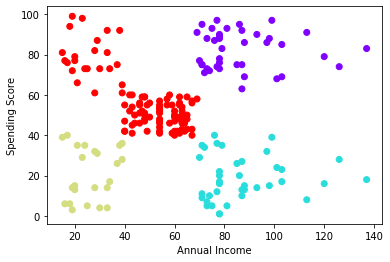

In [18]:
plt.scatter(X[:,0],X[:,1], c=km_predict4, cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [19]:
#Prepare 3 clusters

km3=KMeans(n_clusters=3)
km3.fit(X)
km_predict3=km3.predict(X)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56

Text(0, 0.5, 'Spending Score')

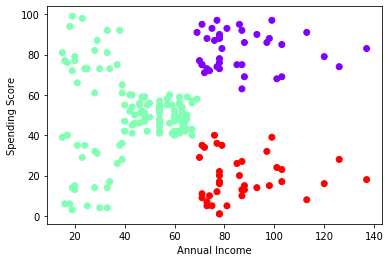

In [21]:
plt.scatter(X[:,0],X[:,1], c=km_predict3, cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [22]:
#Prepare 2 clusters

km2=KMeans(n_clusters=2)
km2.fit(X)
km_predict2=km2.predict(X)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56

Text(0, 0.5, 'Spending Score')

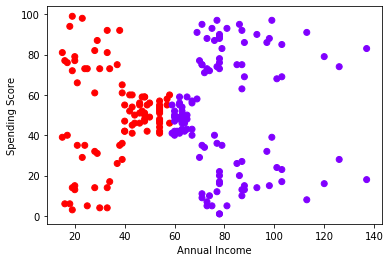

In [23]:
plt.scatter(X[:,0],X[:,1], c=km_predict2, cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [29]:
#Evaluating clustering algorithm

#inertia:metric to evaluate clustering algorithm

#It is the within cluster sum of square of a distance to the cluster centroid

#Algorithm aims to choose centroid that minimizes the inertia

#printing inertia

print('Inertia when cluster=2:', km2.inertia_)
print('Inertia when cluster=3:', km3.inertia_)
print('Inertia when cluster=4:', km4.inertia_)
print('Inertia when cluster=5:', km.inertia_)

Inertia when cluster=2: 181363.59595959596
Inertia when cluster=3: 106348.37306211118
Inertia when cluster=4: 73679.78903948834
Inertia when cluster=5: 44448.45544793371


In [30]:
#Issue
#How many clusters are suitable for a dataset?
#It can be decided by the looking at the data & problem

#Elbow method: used to find the optimal no. of clusters for a given problem


In [34]:
#Elbow method
E=[]

#creating 2 to 10 clusters on the data
for i in range(2, 11):
    km_i=KMeans(n_clusters=i)
    km_i.fit(X)
    
    #appending the inertia of each cluster at the end of the list E
    E.append(km_i.inertia_)



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56

In [35]:
for i in E:
    print('Inertia:',i)

Inertia: 181363.59595959596
Inertia: 106348.37306211118
Inertia: 73679.78903948834
Inertia: 44448.45544793371
Inertia: 37233.81451071001
Inertia: 31583.261826590504
Inertia: 25012.917069885476
Inertia: 21862.092672182887
Inertia: 20033.169133906726


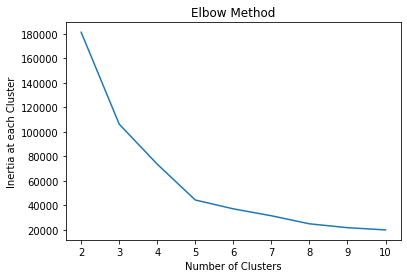

In [36]:
#Plotting the graph for Elbow method

plt.plot(range(2,11), E)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia at each Cluster')
plt.show()

In [ ]:
#the elbow shape is created at cluster=5.
#So, The number of optimal clusters for this data is 5. 